In [244]:
import us
import pandas as pd
import geopandas
import numpy as np

from shapely.geometry import Point
from geopandas.plotting import plot_point_collection

In [257]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.style.use('seaborn-muted')

In [202]:
df = pd.read_json('../data/scores.json', lines=True)

In [203]:
df.head(10)

,ALAND,ALAND_SQMI,ANSICODE,AWATER,AWATER_SQMI,DENSITY,FUNCSTAT,GEOID,HU10,INTPTLAT,INTPTLONG,LSAD,NAME,POP10,USPS
0,83433066,32.214,2408722,5897218,2.277,4502.000280,S,671246,2117,37.098569,-119.326290,57,Shaver Lake CDP,634,CA
1,2812299,1.086,2407524,0,0.000,788.644367,A,2260565,64,32.738101,-91.438126,47,Pioneer village,156,LA
2,9143613,3.530,2410837,0,0.000,1531.211341,A,4842844,997,33.010954,-94.362628,25,Linden city,1988,TX
3,2209039,0.853,2398475,0,0.000,1495.539518,A,1744719,139,40.152591,-91.221571,47,Loraine village,313,IL
4,5946909,2.296,2394336,28667,0.011,1615.991021,A,2931132,1376,36.232528,-89.747362,25,Hayti city,2939,MO
5,15931944,6.151,2412018,524629,0.203,1401.492036,A,4171650,3566,43.388954,-123.322293,25,Sutherlin city,7810,OR
6,996803,0.385,2413346,0,0.000,364.635494,A,874815,151,38.232773,-103.663312,43,Sugar City town,258,CO
7,30527082,11.787,2390597,26533,0.010,7887.074789,A,2436075,18682,39.640182,-77.722691,25,Hagerstown city,39662,MD
8,3719597,1.436,2407244,0,0.000,1866.207091,A,3757860,748,34.826217,-78.025902,43,Rose Hill town,1626,NC
9,6483131,2.503,2407502,3347548,1.292,59332.183954,A,1245175,3935,25.867011,-80.178341,47,Miami Shores village,10493,FL


In [204]:
df['point'] = df.apply(lambda r: Point(r.INTPTLONG, r.INTPTLAT), axis=1)

In [205]:
gdf = geopandas.GeoDataFrame(df, geometry='point')

In [206]:
states = geopandas.read_file('../data/cb_2017_us_state_5m/cb_2017_us_state_5m.shp')

In [224]:
def plot_state(state):
    ax = states[states.STUSPS==state].plot(color='white', edgecolor='black', figsize=(20,20))
    sdf = gdf[gdf.USPS==state]
    plot_point_collection(ax, sdf.point, sdf.DENSITY, markersize=sdf['POP10'] / 200, alpha=1, cmap='Reds', edgecolor='black')

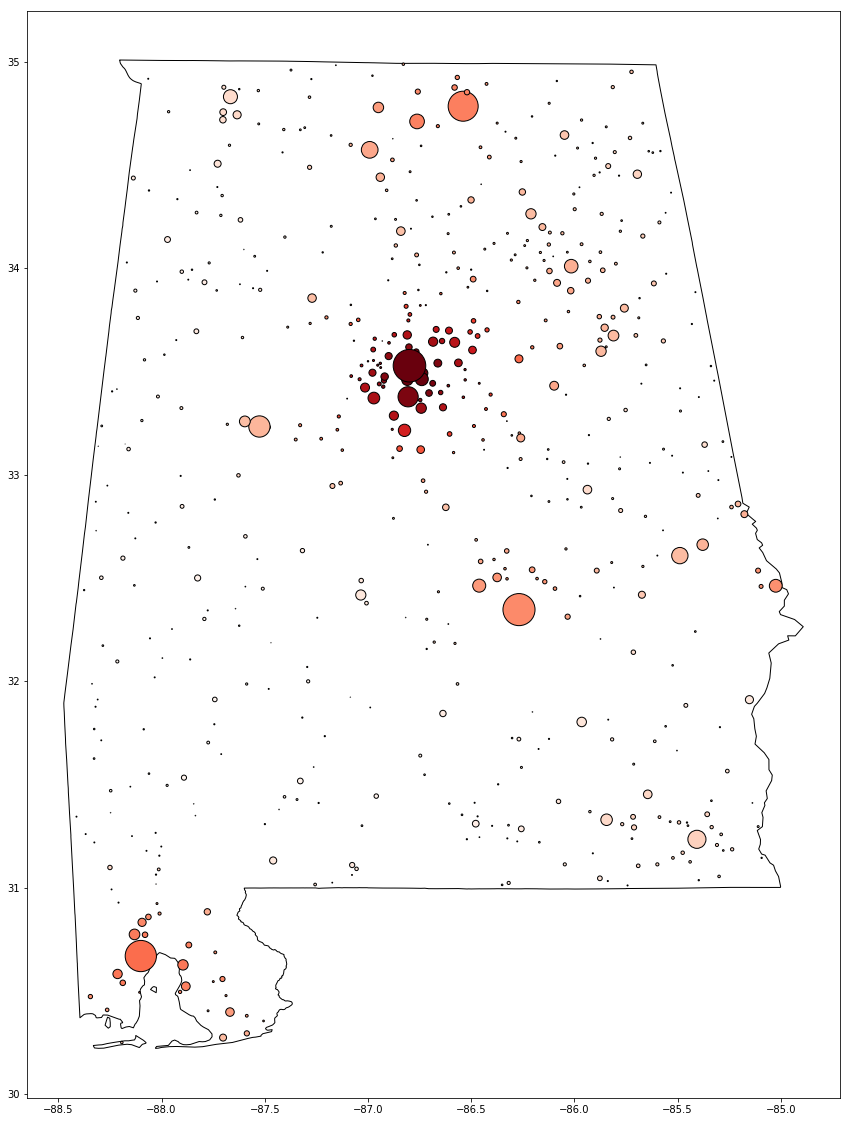

In [225]:
plot_state('AL')

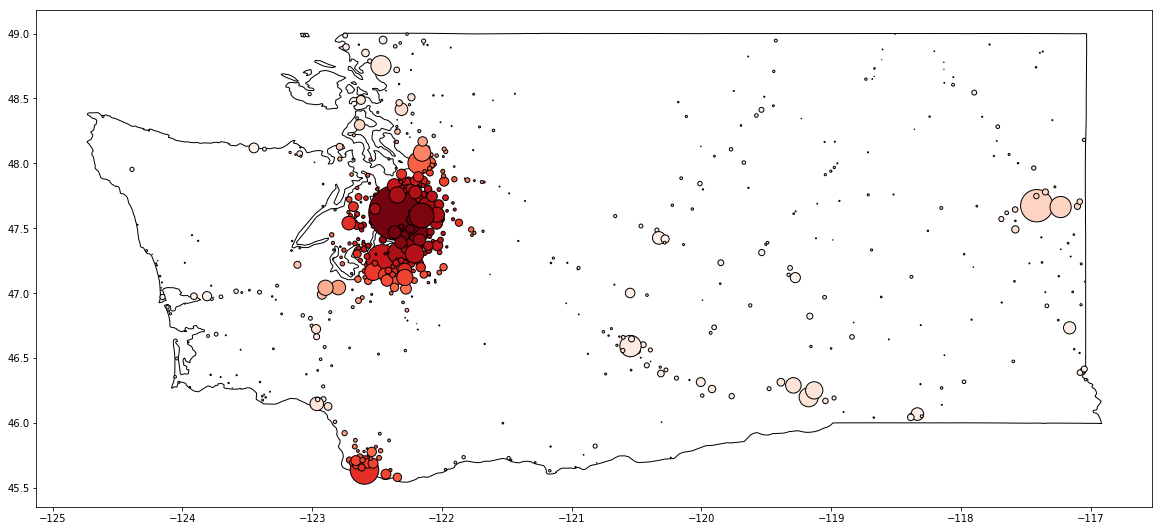

In [226]:
plot_state('WA')

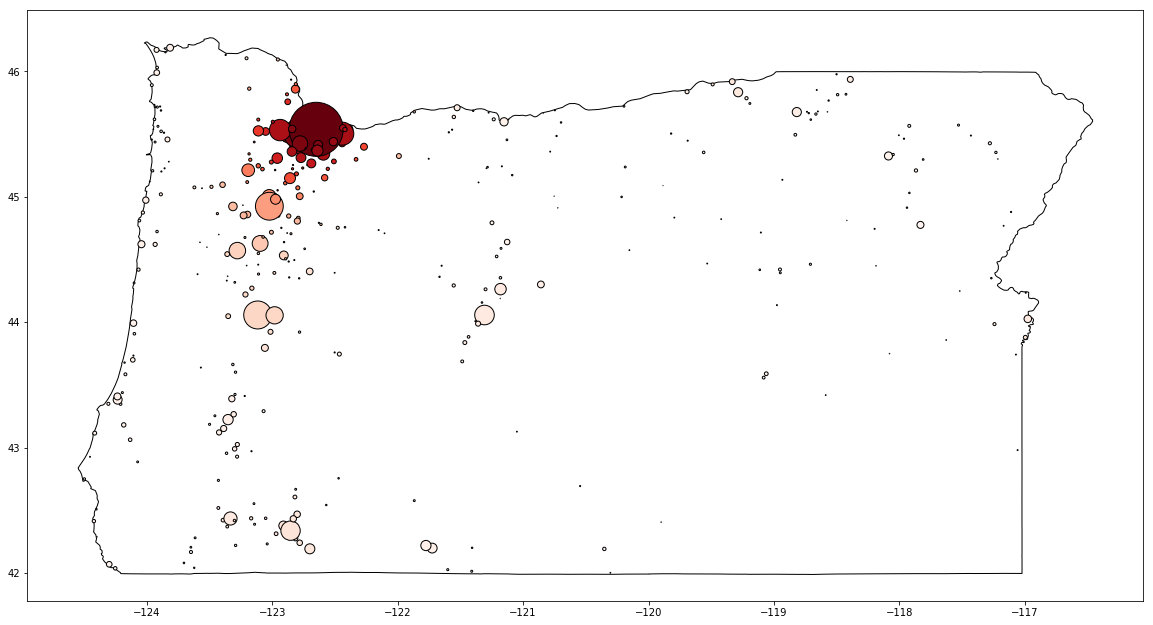

In [227]:
plot_state('OR')

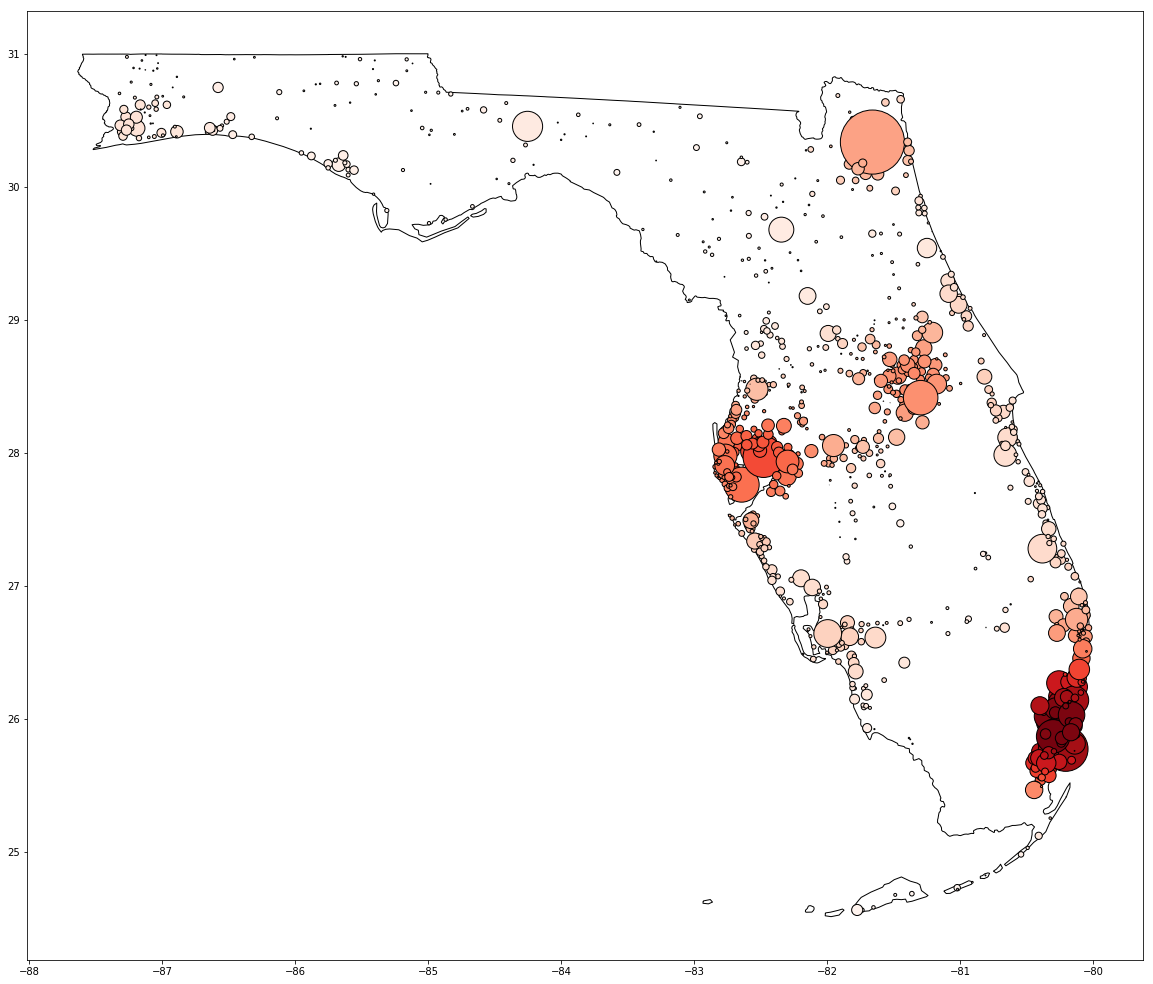

In [228]:
plot_state('FL')

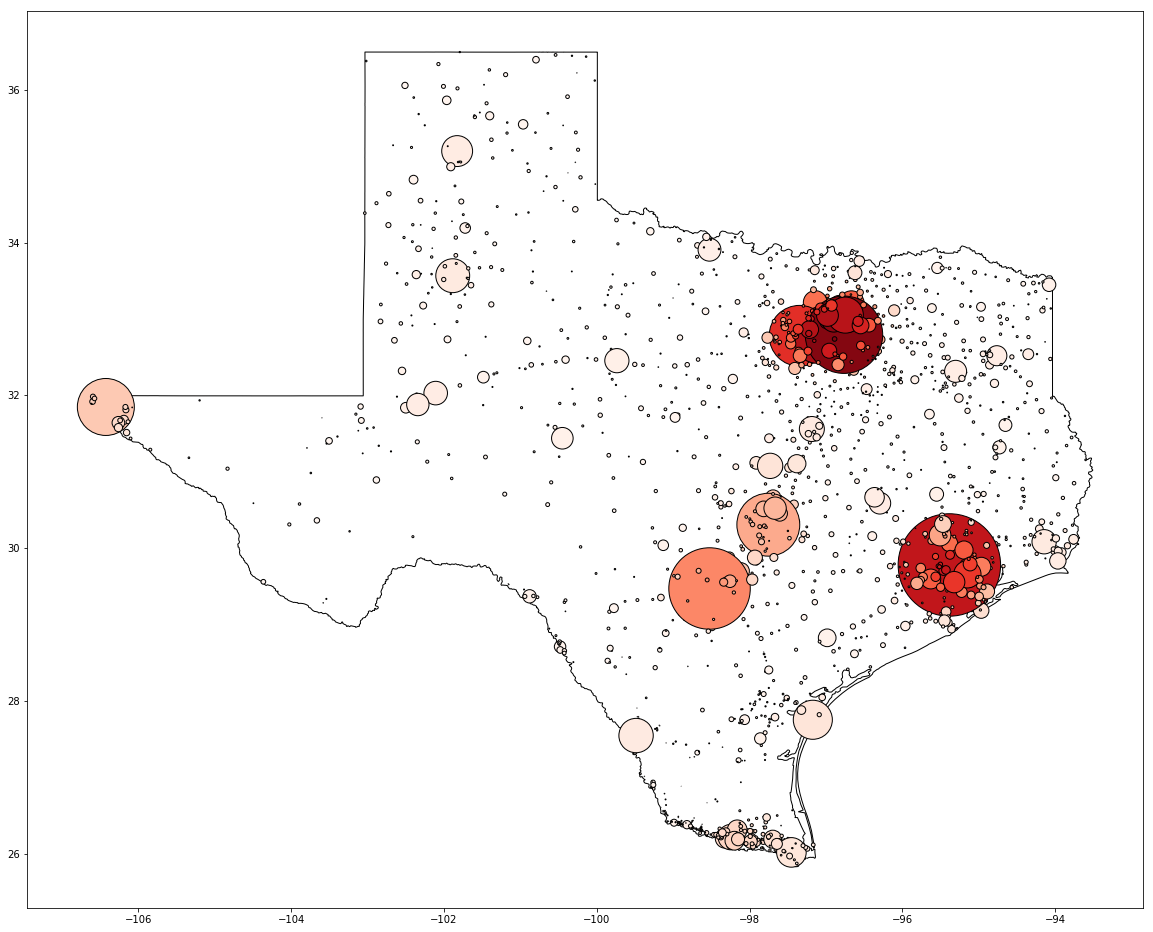

In [229]:
plot_state('TX')

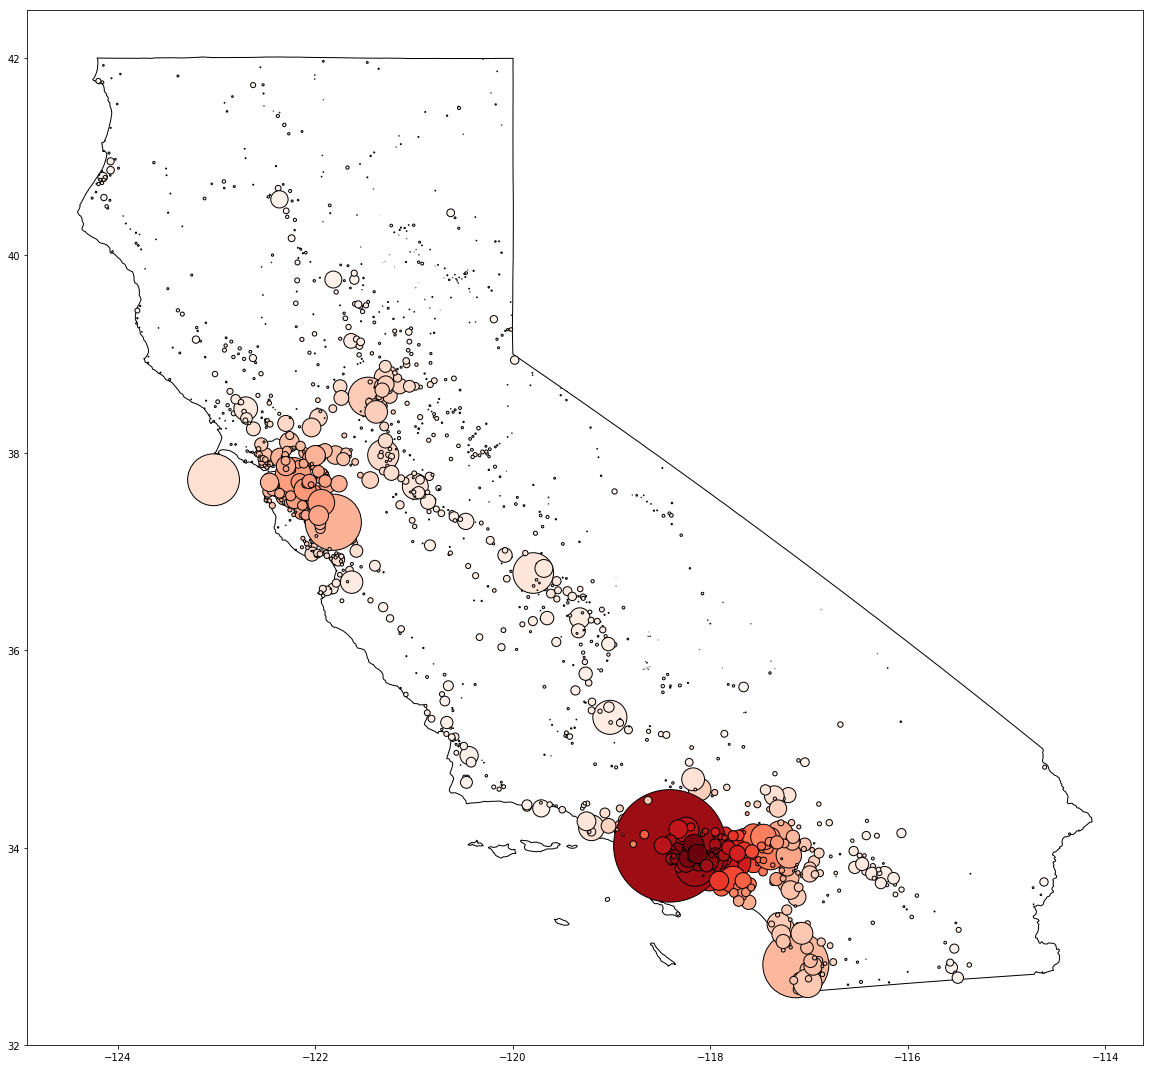

In [222]:
plot_state('CA')

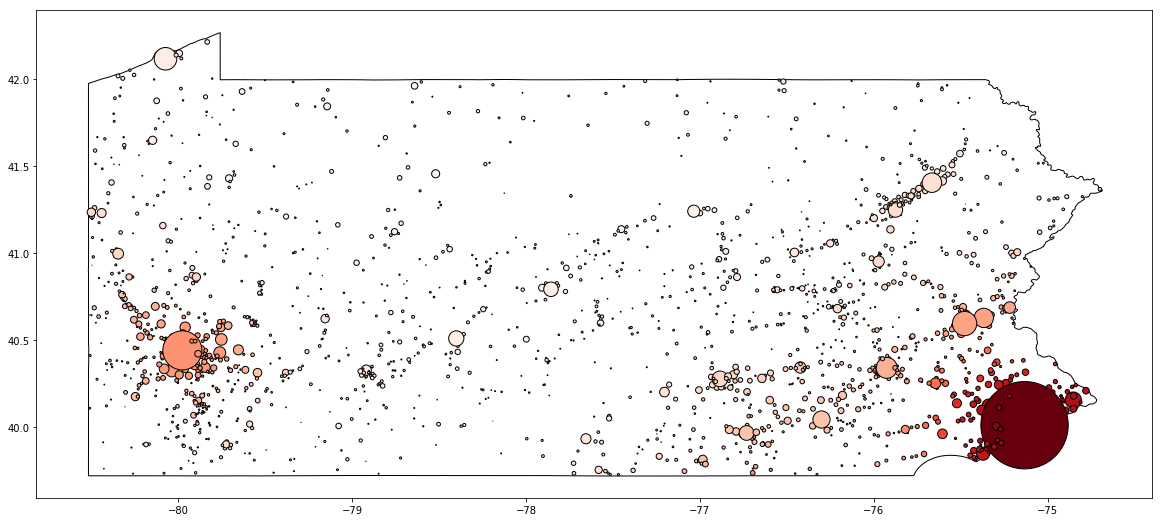

In [232]:
plot_state('PA')

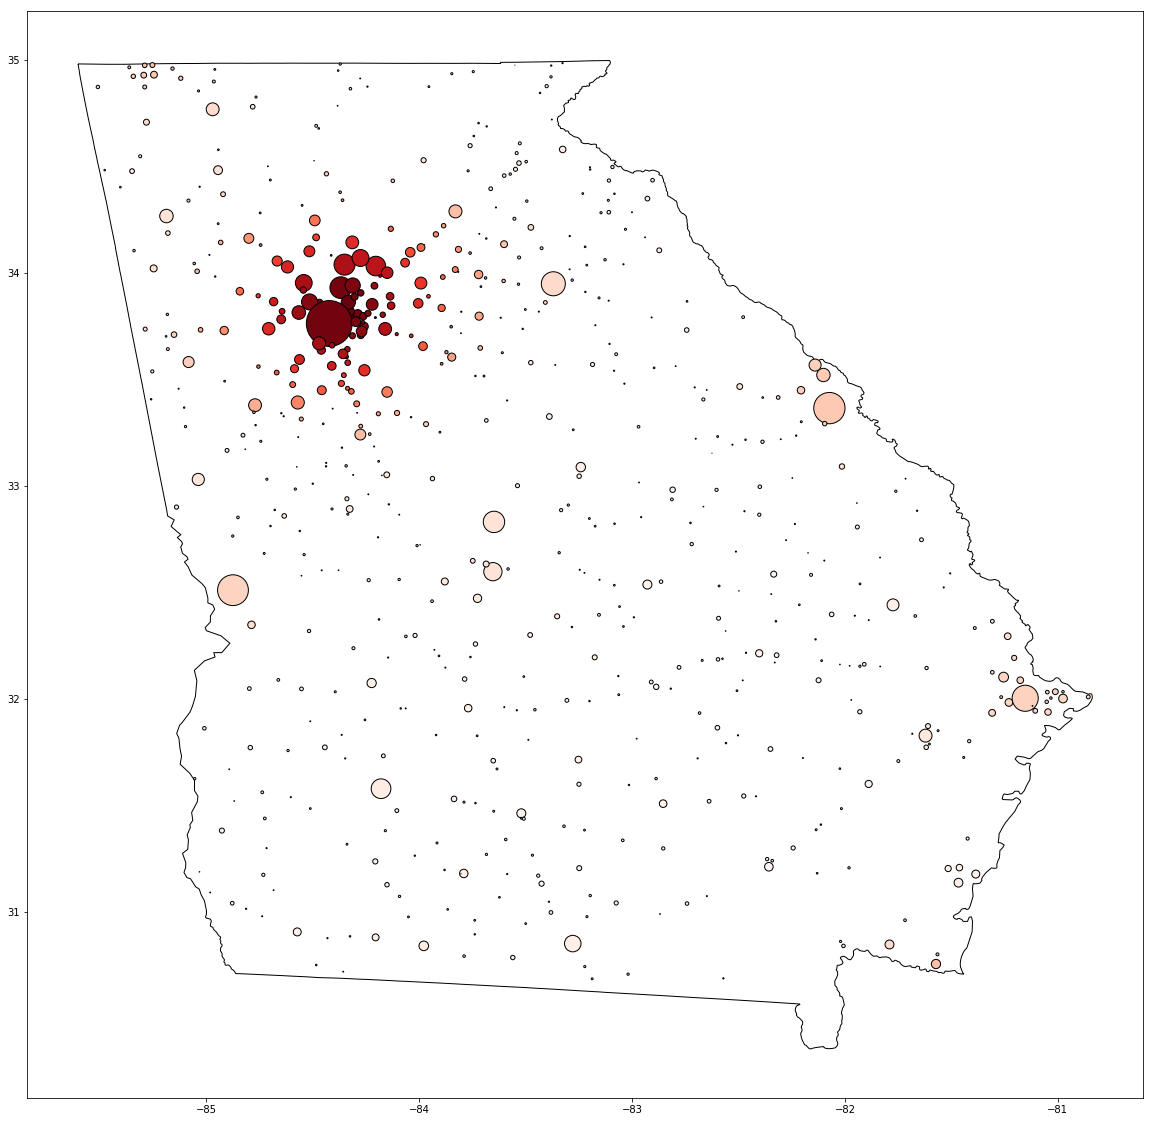

In [266]:
plot_state('GA')

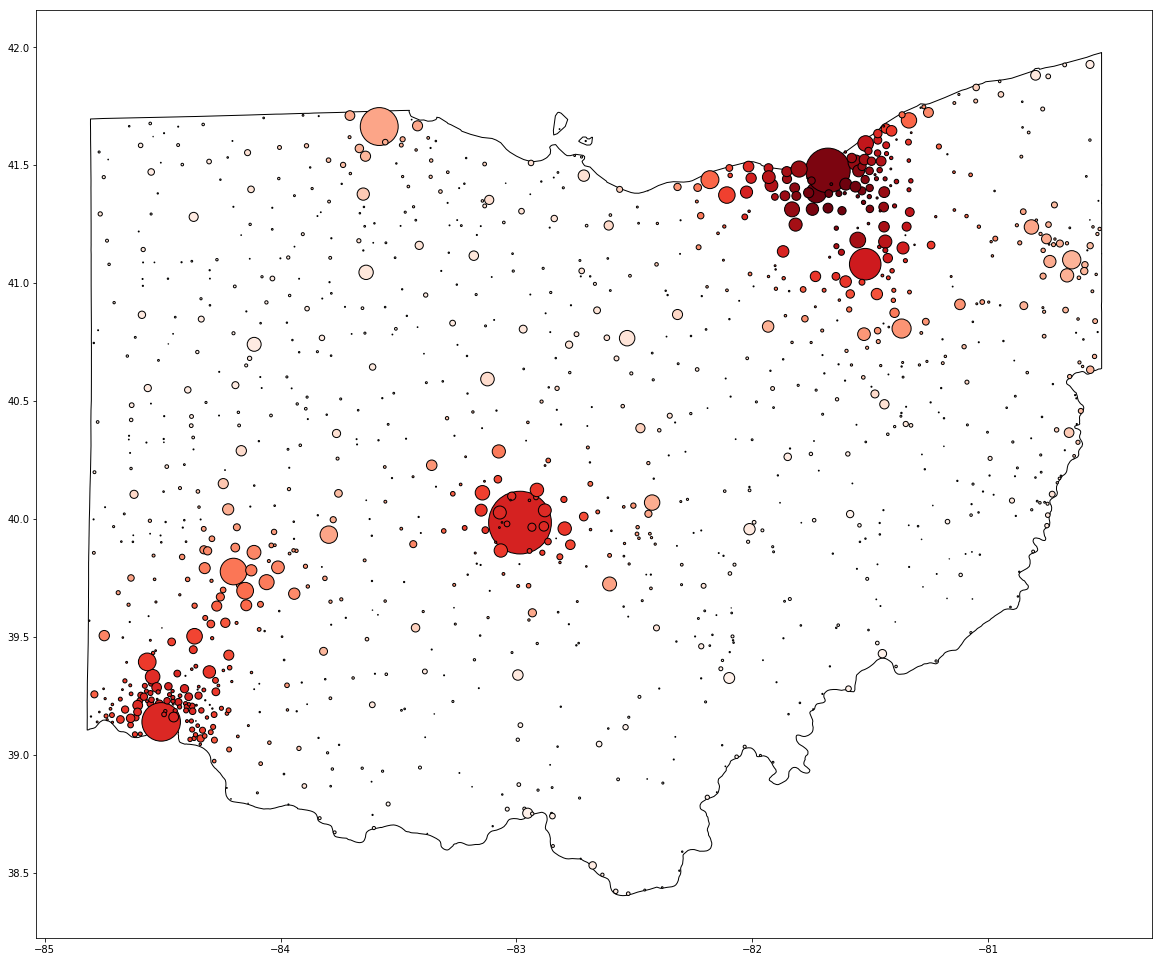

In [267]:
plot_state('OH')

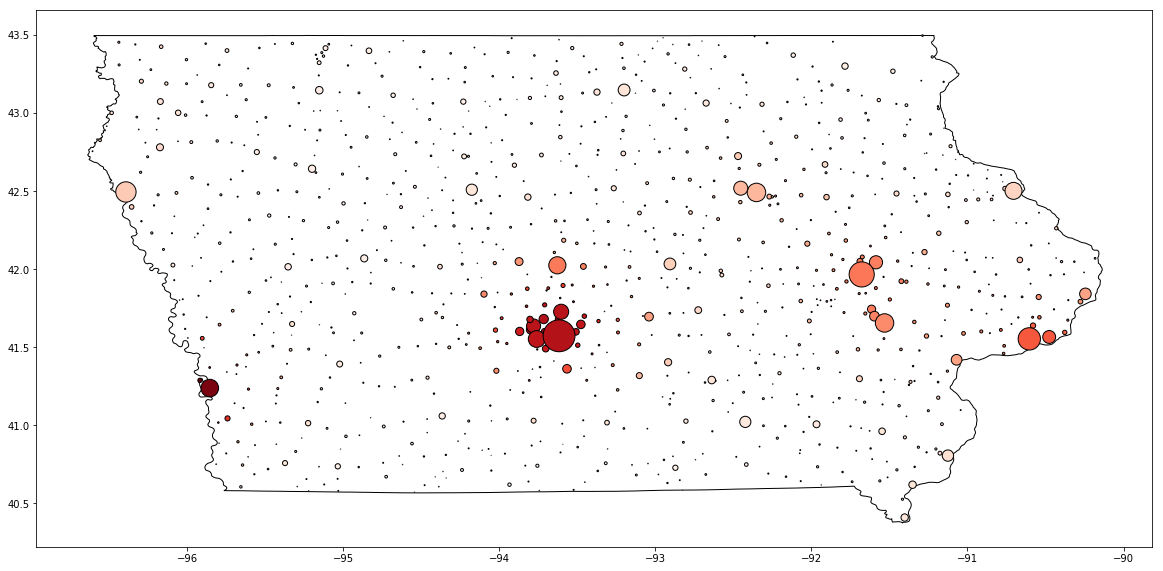

In [268]:
plot_state('IA')

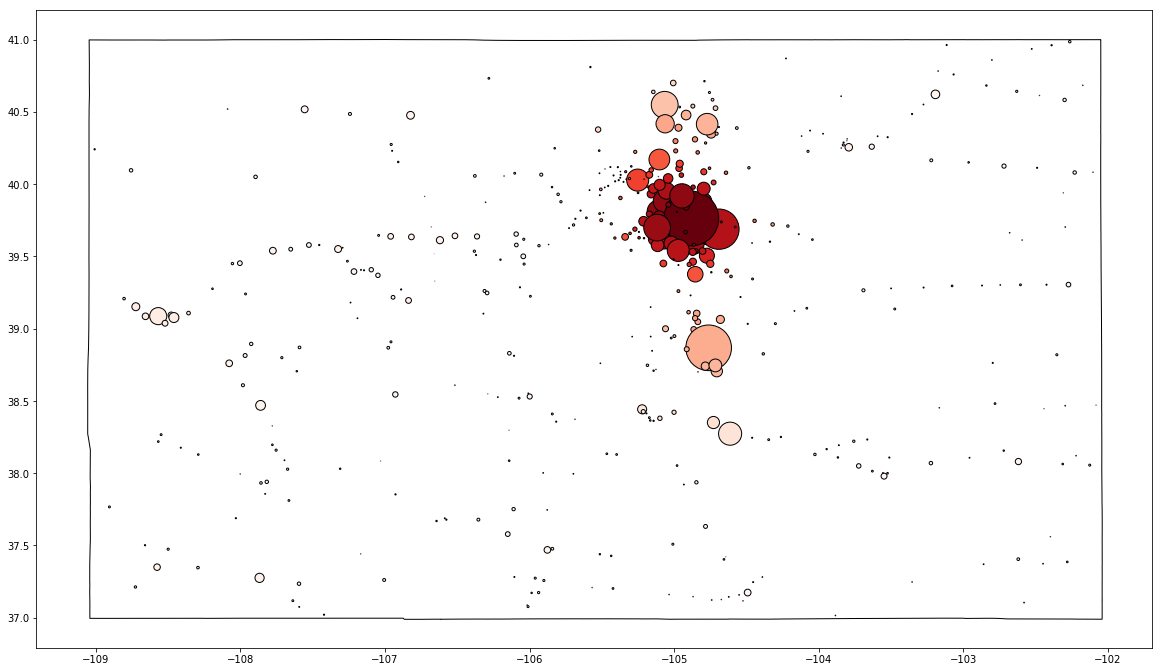

In [273]:
plot_state('CO')

In [172]:
df[(df.NAME.str.contains('New Haven')) & (df.USPS=='CT')]

,ALAND,ALAND_SQMI,ANSICODE,AWATER,AWATER_SQMI,DENSITY,FUNCSTAT,GEOID,HU10,INTPTLAT,INTPTLONG,LSAD,NAME,POP10,USPS,point
17937,48377442,18.679,2378285,3744699,1.446,28971.106929,A,952000,54967,41.310809,-72.924953,25,New Haven city,129779,CT,POINT (-72.924953 41.310809)


In [174]:
df[(df.NAME.str.contains('Birmingham')) & (df.USPS=='AL')]

,ALAND,ALAND_SQMI,ANSICODE,AWATER,AWATER_SQMI,DENSITY,FUNCSTAT,GEOID,HU10,INTPTLAT,INTPTLONG,LSAD,NAME,POP10,USPS,point
14763,378310927,146.067,2403868,6590665,2.545,13883.171159,A,107000,108981,33.527444,-86.799047,25,Birmingham city,212237,AL,POINT (-86.799047 33.527444)


In [238]:
states_cont = [s.abbr for s in us.states.STATES_CONTIGUOUS]

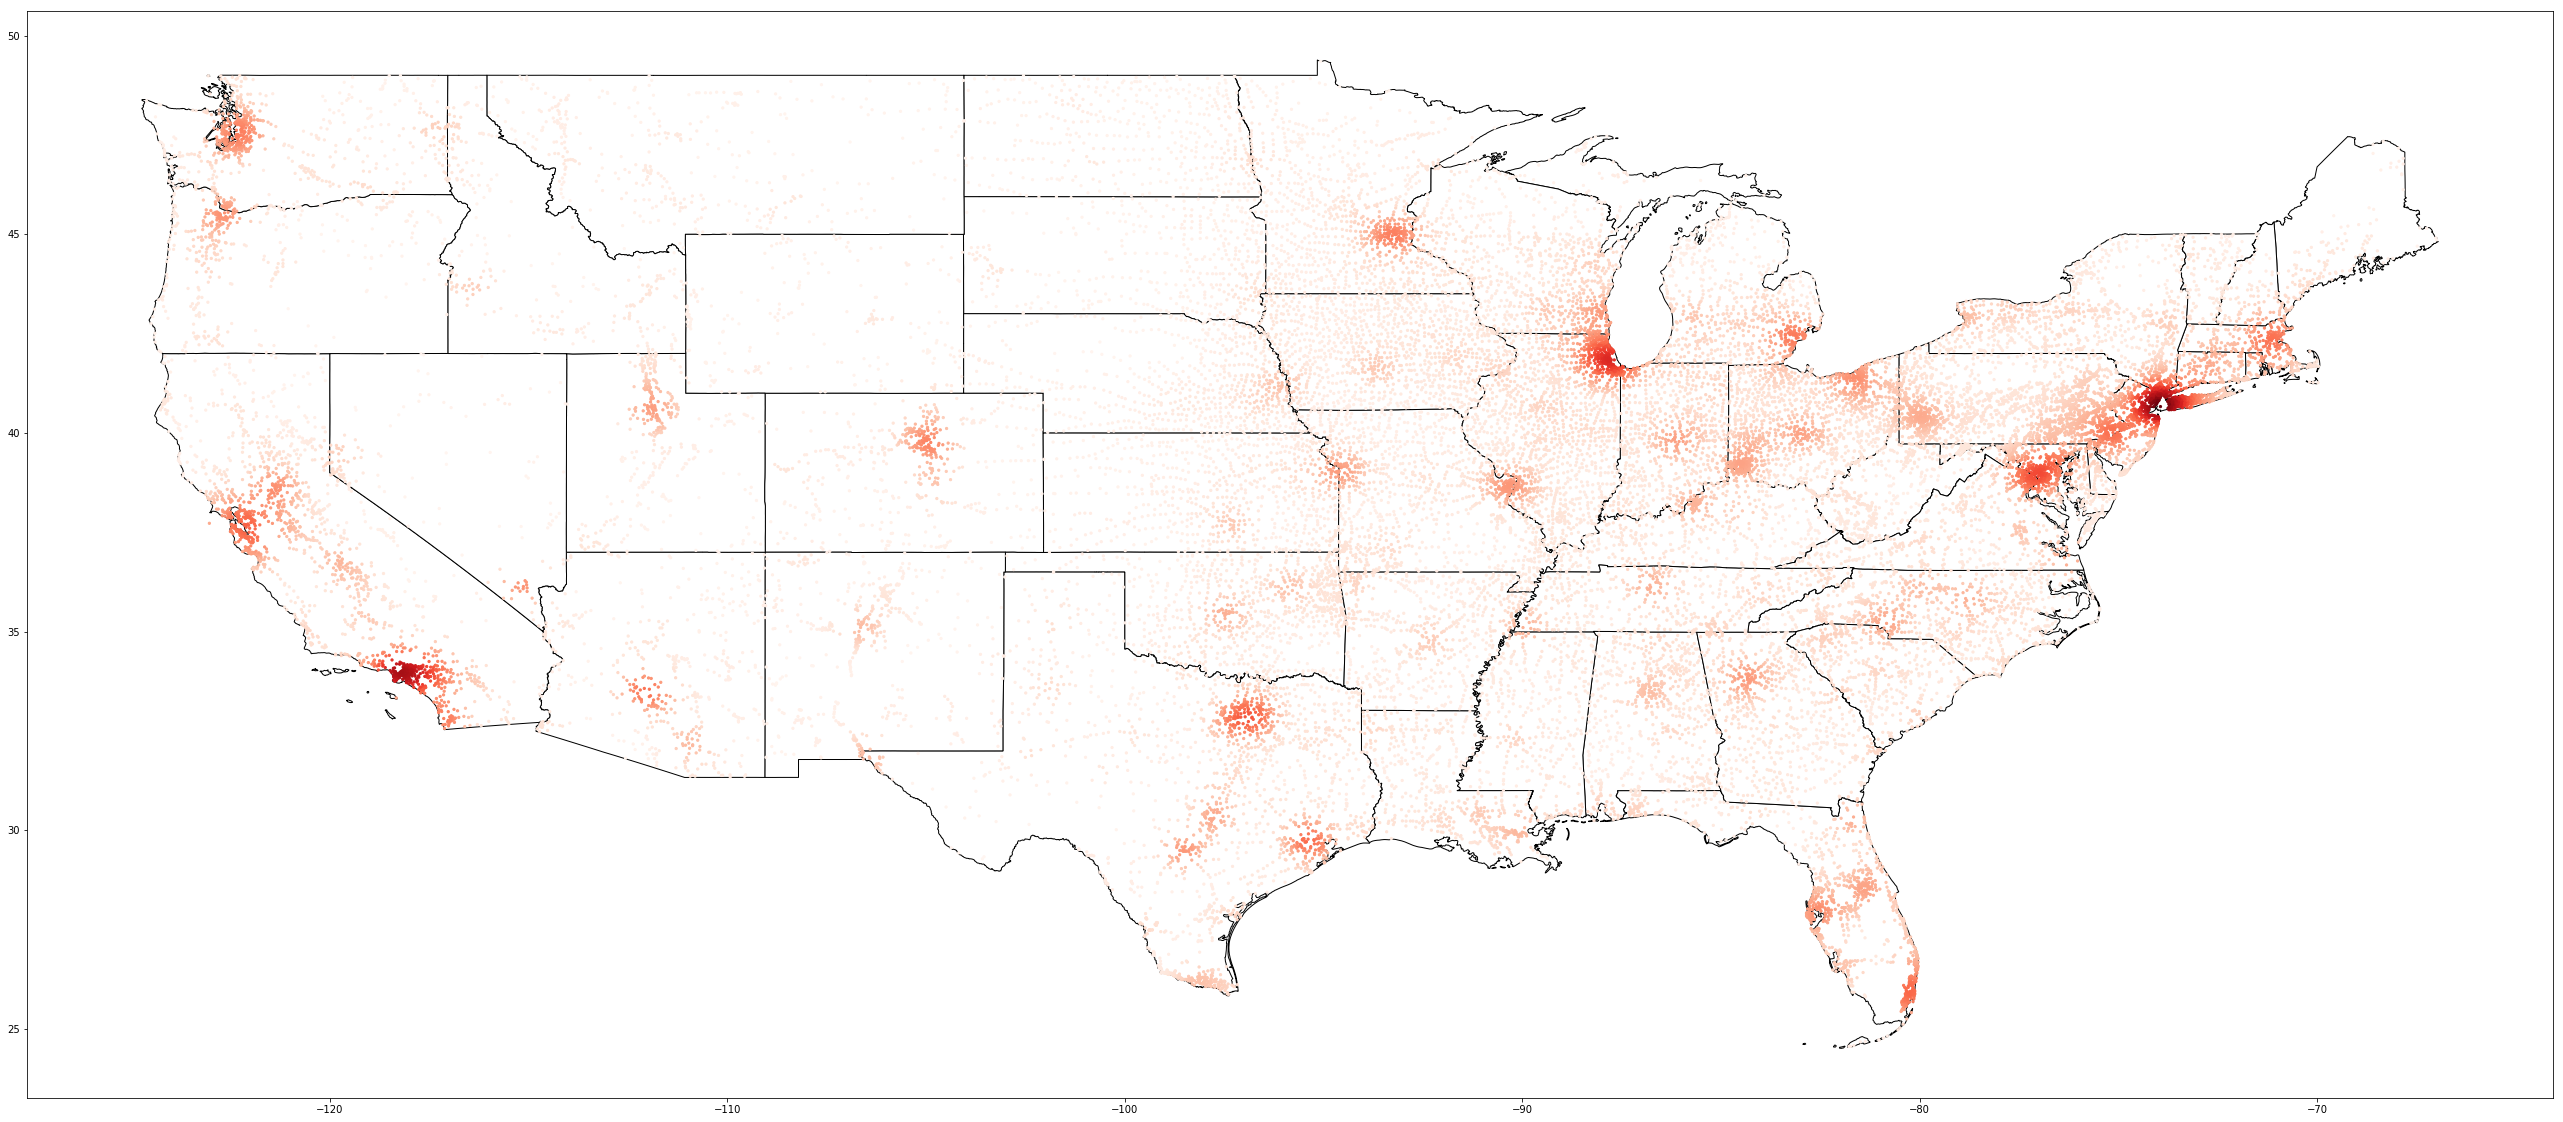

In [256]:
ax = states[states.STUSPS.isin(states_cont)].plot(color='white', edgecolor='black', figsize=(50,20))
sdf = gdf[gdf.USPS.isin(states_cont)]
plot_point_collection(ax, sdf.point, np.sqrt(sdf.DENSITY), markersize=5, cmap='Reds')